In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [13]:
from proj1_helpers import *

DATA_TRAIN_PATH = "../data/train.csv" # download train data and supply path
y_tr, tX_tr, ids_tr = load_csv_data(DATA_TRAIN_PATH)

DATA_TEST_PATH = "../data/test.csv" #download train data and supply path
y_fin, tX_fin, ids_fin = load_csv_data(DATA_TEST_PATH)

In [14]:
ind = 80000
y_tr = y_tr[:ind]
tX_tr = tX_tr[:ind,:]
ids_tr = ids_tr[:ind]

## Implementation

In [15]:
from data_analysis import *

##### Data analysis #####

#Separate the data
jet_num = 0
y0_tr, tX0_tr, ids0_tr, y0_fin, tX0_fin, ids0_fin = data_analysis(jet_num, y_tr, tX_tr, ids_tr, y_fin, tX_fin, ids_fin)
jet_num = 1
y1_tr, tX1_tr, ids1_tr, y1_fin, tX1_fin, ids1_fin = data_analysis(jet_num, y_tr, tX_tr, ids_tr, y_fin, tX_fin, ids_fin)
jet_num = 2
y2_tr, tX2_tr, ids2_tr, y2_fin, tX2_fin, ids2_fin = data_analysis(jet_num, y_tr, tX_tr, ids_tr, y_fin, tX_fin, ids_fin)
jet_num = 3
y3_tr, tX3_tr, ids3_tr, y3_fin, tX3_fin, ids3_fin = data_analysis(jet_num, y_tr, tX_tr, ids_tr, y_fin, tX_fin, ids_fin)


In [16]:
# Split the data into train (80%) and test (20%) parts 
ratio = 0.8;
tX0_tr, tX0_te, y0_tr, y0_te, ids0_tr, ids0_te = split_data(tX0_tr, y0_tr, ids0_tr, ratio)
tX1_tr, tX1_te, y1_tr, y1_te, ids1_tr, ids1_te = split_data(tX1_tr, y1_tr, ids1_tr, ratio)
tX2_tr, tX2_te, y2_tr, y2_te, ids2_tr, ids2_te = split_data(tX2_tr, y2_tr, ids2_tr, ratio)
tX3_tr, tX3_te, y3_tr, y3_te, ids3_tr, ids3_te = split_data(tX3_tr, y3_tr, ids3_tr, ratio)

0.0006158482110660267
0.26366508987303583
0.0011288378916846883
0.00379269019073225


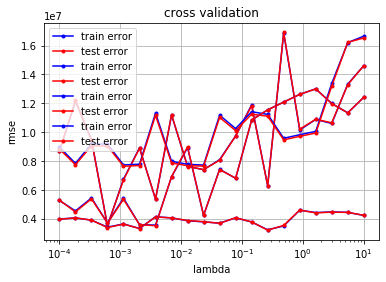

In [17]:
from implementation import *
from optimization import * 

##### TRAINING #####
##### Cross validation #####

lambda_ = 0.15;
gamma = 0.01
max_iters = 150

best_lambdas = [0., 0., 0., 0.,]

init_w0, _ = least_squares(y0_tr, tX0_tr)
init_w1, _ = least_squares(y1_tr, tX1_tr)
init_w2, _ = least_squares(y2_tr, tX2_tr)
init_w3, _ = least_squares(y3_tr, tX3_tr)

best_lambdas[0] = cross_validation_lambda(y0_tr, tX0_tr, init_w0, max_iters, gamma)
print(best_lambdas[0])

best_lambdas[1] = cross_validation_lambda(y1_tr, tX1_tr, init_w1, max_iters, gamma)
print(best_lambdas[1])

best_lambdas[2] = cross_validation_lambda(y2_tr, tX2_tr, init_w2, max_iters, gamma)
print(best_lambdas[2])

best_lambdas[3] = cross_validation_lambda(y3_tr, tX3_tr, init_w3, max_iters, gamma)
print(best_lambdas[3])

##### Logistic regression #####

w0, loss0 = reg_logistic_regression(y0_tr, tX0_tr, best_lambdas[0], init_w0, max_iters, gamma)
w1, loss1 = reg_logistic_regression(y1_tr, tX1_tr, best_lambdas[1], init_w1, max_iters, gamma)
w2, loss2 = reg_logistic_regression(y2_tr, tX2_tr, best_lambdas[2], init_w2, max_iters, gamma)
w3, loss3 = reg_logistic_regression(y3_tr, tX3_tr, best_lambdas[3], init_w3, max_iters, gamma)

## Test the implementation:

In [18]:
y0_pred = predict_labels(w0, tX0_te)
y1_pred = predict_labels(w1, tX1_te)
y2_pred = predict_labels(w2, tX2_te)
y3_pred = predict_labels(w3, tX3_te)

y0_pred[y0_pred <= 0.5] = -1
y0_pred[y0_pred > 0.5] = +1

y1_pred[y1_pred <= 0.5] = -1
y1_pred[y1_pred > 0.5] = +1

y2_pred[y2_pred <= 0.5] = -1
y2_pred[y2_pred > 0.5] = +1

y3_pred[y3_pred <= 0.5] = -1
y3_pred[y3_pred > 0.5] = +1

y0_te[y0_te <= 0.5] = -1
y0_te[y0_te > 0.5] = +1

y1_te[y1_te <= 0.5] = -1
y1_te[y1_te > 0.5] = +1

y2_te[y2_te <= 0.5] = -1
y2_te[y2_te > 0.5] = +1

y3_te[y3_te <= 0.5] = -1
y3_te[y3_te > 0.5] = +1



print(y0_pred)
print(y0_te)

grades = [0., 0., 0., 0.]
res0 = np.where(y0_te[:,] == y0_pred[:,], 1, 0)
grades[0] = np.mean(res0)
res1 = np.where(y1_te[:,] == y1_pred[:,], 1, 0)
grades[1] = np.mean(res0)
res2 = np.where(y2_te[:,] == y2_pred[:,], 1, 0)
grades[2] = np.mean(res2)
res3 = np.where(y3_te[:,] == y3_pred[:,], 1, 0)
grades[3] = np.mean(res3)
grade = np.mean(grades)


[-1.  1.  1. ... -1.  1. -1.]
[ 1. -1. -1. ... -1. -1. -1.]


In [19]:
print(grade)

0.7012931999691356


## Generate predictions and save ouput in csv format for submission:

In [11]:
y0_pred = predict_labels(w0, tX0_fin)
y1_pred = predict_labels(w1, tX1_fin)
y2_pred = predict_labels(w2, tX2_fin)
y3_pred = predict_labels(w3, tX3_fin)

In [12]:
y_pred = np.concatenate([y0_pred, y1_pred, y2_pred, y3_pred])
ids_pred = np.concatenate([ids0_te, ids1_te, ids2_te, ids3_te])
OUTPUT_PATH = 'results_ridge.csv' 
create_csv_submission(ids_pred, y_pred, OUTPUT_PATH)